In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### About columns

**Diabetes_binary**: you have diabetes (0,1)

**HighBP**: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol**: Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck**: Cholesterol check within past five years (0,1)

**BMI**: Body Mass Index (BMI)

**Smoker**: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke**: (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits**: Consume Fruit 1 or more times per day (0,1)

**Veggies**: Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare**: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth**: Would you say that in general your health is: rate (1 ~ 5)

**MentHlth**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk**: Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex**: Indicate sex of respondent (0,1) (Female or Male)

**Age**: Fourteen-level age category (1 ~ 14)

**Education**: What is the highest grade or year of school you completed? (1 ~ 6)

**Income**: Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

### EDA

In [4]:
df.shape

(253680, 22)

In [5]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


#### All the values need to be converted to int

In [8]:
df.rename({"Diabetes_binary": "HasDiabetes", "HeartDiseaseorAttack": "MI_CHD"}, axis=1, inplace=True)

In [9]:
for col in df.columns:
    df[col] = df[col].astype("int8")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   HasDiabetes        253680 non-null  int8 
 1   HighBP             253680 non-null  int8 
 2   HighChol           253680 non-null  int8 
 3   CholCheck          253680 non-null  int8 
 4   BMI                253680 non-null  int8 
 5   Smoker             253680 non-null  int8 
 6   Stroke             253680 non-null  int8 
 7   MI_CHD             253680 non-null  int8 
 8   PhysActivity       253680 non-null  int8 
 9   Fruits             253680 non-null  int8 
 10  Veggies            253680 non-null  int8 
 11  HvyAlcoholConsump  253680 non-null  int8 
 12  AnyHealthcare      253680 non-null  int8 
 13  NoDocbcCost        253680 non-null  int8 
 14  GenHlth            253680 non-null  int8 
 15  MentHlth           253680 non-null  int8 
 16  PhysHlth           253680 non-null  in

### Getting number of unique values in all the columns

In [11]:
unique_vals = {}

for col in df.columns:
    unique_vals[col] = df[col].value_counts().shape[0]

print(pd.DataFrame(unique_vals, index=["n_unique"]).T)

                   n_unique
HasDiabetes               2
HighBP                    2
HighChol                  2
CholCheck                 2
BMI                      84
Smoker                    2
Stroke                    2
MI_CHD                    2
PhysActivity              2
Fruits                    2
Veggies                   2
HvyAlcoholConsump         2
AnyHealthcare             2
NoDocbcCost               2
GenHlth                   5
MentHlth                 31
PhysHlth                 31
DiffWalk                  2
Sex                       2
Age                      13
Education                 6
Income                    8


### Get value counts of all columns

In [12]:
for col in df.columns:
    print(df[col].value_counts())
    print("-" * 40)

HasDiabetes
0    218334
1     35346
Name: count, dtype: int64
----------------------------------------
HighBP
0    144851
1    108829
Name: count, dtype: int64
----------------------------------------
HighChol
0    146089
1    107591
Name: count, dtype: int64
----------------------------------------
CholCheck
1    244210
0      9470
Name: count, dtype: int64
----------------------------------------
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
----------------------------------------
Smoker
0    141257
1    112423
Name: count, dtype: int64
----------------------------------------
Stroke
0    243388
1     10292
Name: count, dtype: int64
----------------------------------------
MI_CHD
0    229787
1     23893
Name: count, dtype: int64
----------------------------------------
PhysActivity
1    191920
0     61760
Name: count, dtype: int64
--------------------------

#### From the above info, we see many categories in values for "BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"

### Checking the outliers

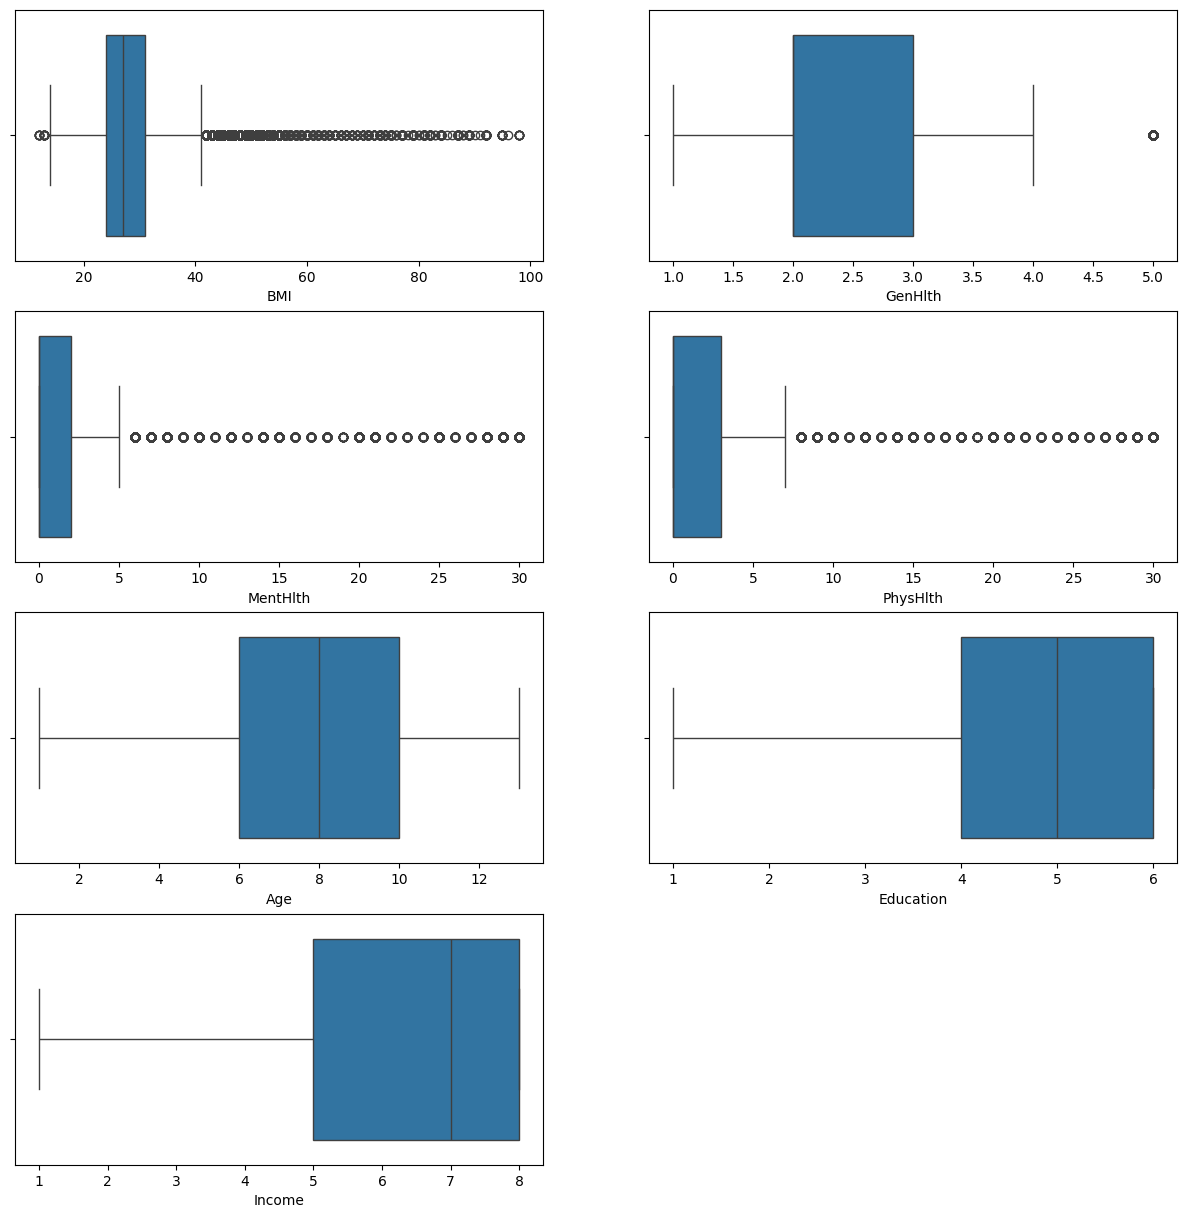

In [13]:
plt.figure(figsize = (15, 15))

for i, col in enumerate(["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=col, data=df)
plt.show()

#### We see that outliers are present in BMI, GenHlth, MentHlth, PhysHlth

### Dropping the duplicate records

In [14]:
# number of duplicated records
df.duplicated().sum()

24206

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(229474, 22)

In [18]:
df.columns

Index(['HasDiabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'MI_CHD', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Exploratory Data Analysis

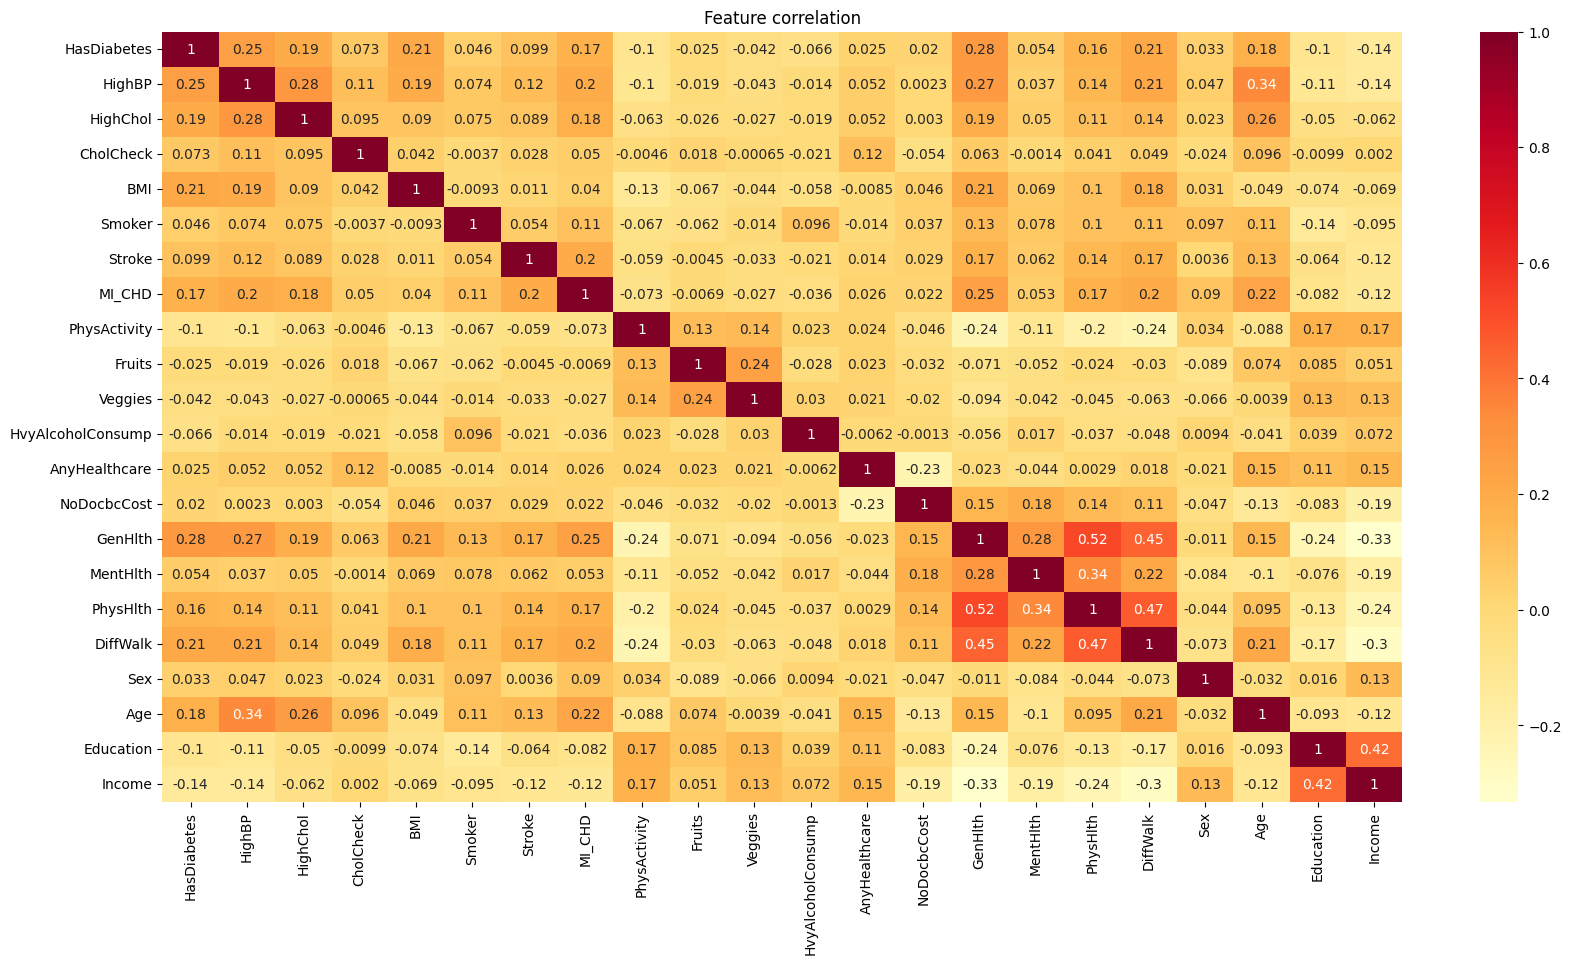

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlOrRd")
plt.title("Feature correlation");

#### Fruits, Veggies, HvyAlcoholConsump, Education, Income show a negative coefficient and rest of the columns show a positive coefficient

### Getting to know the data better

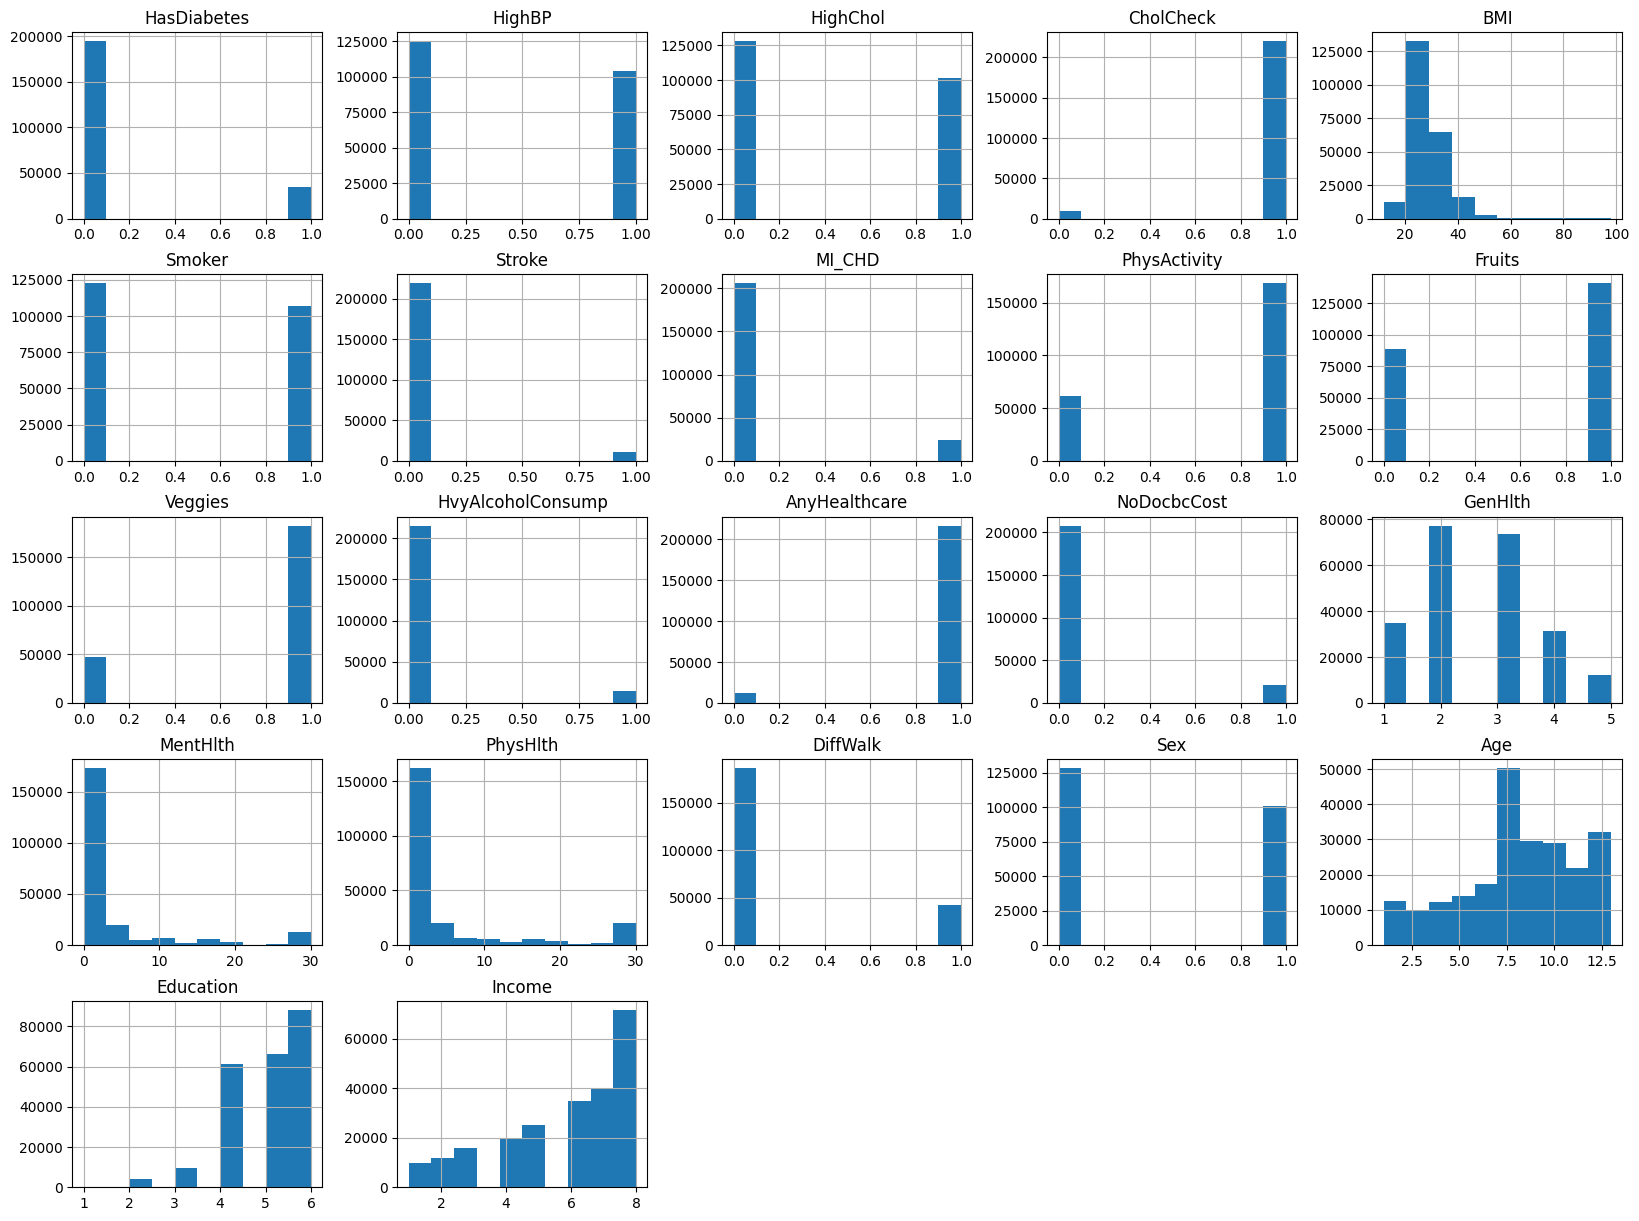

In [20]:
df.hist(figsize=(20,15));

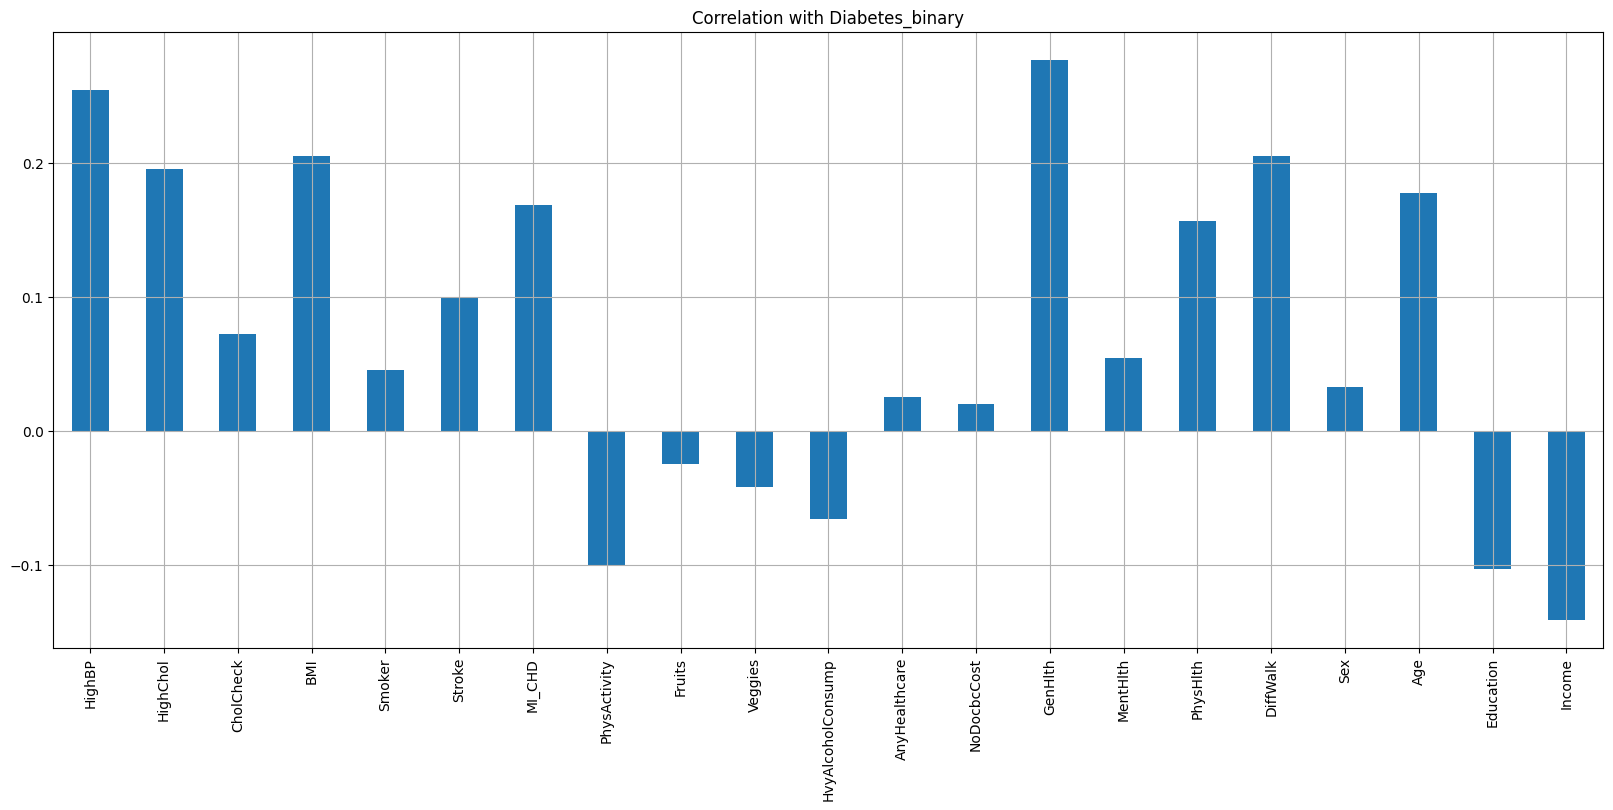

In [21]:
df.drop('HasDiabetes', axis=1) \
    .corrwith(df["HasDiabetes"]) \
    .plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary");

#### Fruits, AnyHealthcare, NoDocbCost are lease correlated and the rest have a significant correlation with the target

In [22]:
df.drop(["Fruits", "AnyHealthcare", "NoDocbcCost"], axis=1, inplace=True)

### Splitting the data

In [23]:
X = df.drop(["HasDiabetes"], axis=1)
y = df["HasDiabetes"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172105, 18), (57369, 18), (172105,), (57369,))

In [27]:
X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'MI_CHD',
       'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

### Modeling

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg = LogisticRegression(max_iter=1500).fit(X_train, y_train)

In [30]:
y_pred = log_reg.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     48525
           1       0.54      0.15      0.24      8844

    accuracy                           0.85     57369
   macro avg       0.70      0.56      0.58     57369
weighted avg       0.81      0.85      0.81     57369



#### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

In [35]:
y_pred = dt_clf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     48525
           1       0.29      0.32      0.30      8844

    accuracy                           0.78     57369
   macro avg       0.58      0.59      0.59     57369
weighted avg       0.78      0.78      0.78     57369



#### KNearestNeighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

In [39]:
y_pred = knn.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     48525
           1       0.45      0.12      0.18      8844

    accuracy                           0.84     57369
   macro avg       0.65      0.54      0.55     57369
weighted avg       0.79      0.84      0.80     57369



#### RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_clf = RandomForestClassifier().fit(X_train, y_train)

In [43]:
y_pred = rf_clf.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     48525
           1       0.46      0.18      0.26      8844

    accuracy                           0.84     57369
   macro avg       0.66      0.57      0.58     57369
weighted avg       0.80      0.84      0.81     57369



#### XGBoost

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb_clf = XGBClassifier().fit(X_train, y_train)

In [47]:
y_pred = xgb_clf.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     48525
           1       0.56      0.17      0.26      8844

    accuracy                           0.85     57369
   macro avg       0.71      0.57      0.59     57369
weighted avg       0.82      0.85      0.82     57369



### Choosing the final model

We can get the baseline performance from Random Forest Classifier

- The baseline accuracy is 85%
- Training of models like KNN is slower is are not easily interpretable.
- XGBoost also gives about the same accuracy as Random Forest

### Why Random Forest?
- Ensemble technique
- Gives a good accuracy as well as F1 score

### Saving the model

In [49]:
import pickle

In [50]:
with open("./model.pkl", "wb") as f:
    pickle.dump(rf_clf, f)